In [1]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'D:\\coding\\My_git_rep\\ML-AndrewNg-homework\\ex1_linear_regression'

In [3]:
data = pd.read_csv("ex1data1.txt",names=["x","y"],header=None)
print(data)

          x         y
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
5    8.3829  11.88600
6    7.4764   4.34830
7    8.5781  12.00000
8    6.4862   6.59870
9    5.0546   3.81660
10   5.7107   3.25220
11  14.1640  15.50500
12   5.7340   3.15510
13   8.4084   7.22580
14   5.6407   0.71618
15   5.3794   3.51290
16   6.3654   5.30480
17   5.1301   0.56077
18   6.4296   3.65180
19   7.0708   5.38930
20   6.1891   3.13860
21  20.2700  21.76700
22   5.4901   4.26300
23   6.3261   5.18750
24   5.5649   3.08250
25  18.9450  22.63800
26  12.8280  13.50100
27  10.9570   7.04670
28  13.1760  14.69200
29  22.2030  24.14700
..      ...       ...
67  10.2360   7.77540
68   5.4994   1.01730
69  20.3410  20.99200
70  10.1360   6.67990
71   7.3345   4.02590
72   6.0062   1.27840
73   7.2259   3.34110
74   5.0269  -2.68070
75   6.5479   0.29678
76   7.5386   3.88450
77   5.0365   5.70140
78  10.2740   6.75260
79   5.1077   2.05760
80   5.729

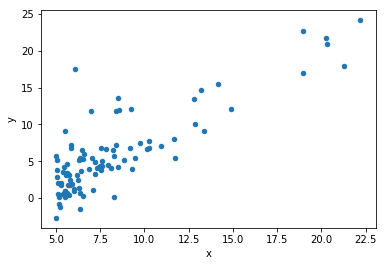

In [4]:
data.plot.scatter(x="x",y="y")

In [5]:
#转为ndarray数据结构
x = data.as_matrix(["x"])
y = data.as_matrix(["y"])
m = x.shape[0]
n = x.shape[1]
x = np.column_stack((np.ones(m),x))
cost = []
print(x.shape)
print(y.shape)
print(m)

(97, 2)
(97, 1)
97


D:\coding\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\coding\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


t_x(m,2) * theta(2,1) ->(m,1)

In [6]:
def h_function(theta):
    return np.dot(x,theta)

In [7]:
def cost_function(theta):
    delta = h_function(theta) - y
    jval = np.sum(delta**2) / (2 * m)
    cost.append(jval)
    return jval

In [8]:
def gradient(theta,learn_rate):
    cost_function(theta)
    delta =  h_function(theta) - y
    t_theta = learn_rate * (np.dot(np.transpose(delta),x)) / m 
    theta = theta - np.transpose(t_theta)
#     print(theta)
    return theta

In [9]:
def run(step):
    ini_theta = np.zeros((n+1,1))
    #print(ini_theta)
    learn_rate = 0.01
    for i in range(step):
        ini_theta = gradient(ini_theta,learn_rate)
    return ini_theta

In [10]:
step = 1000
new_theta = run(step)
print(new_theta)
print(np.sum(h_function(new_theta)))

[[-3.24140214]
 [ 1.1272942 ]]
577.8380296038102


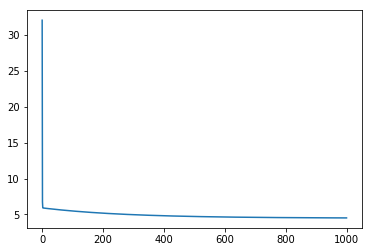

In [11]:
p_x = np.arange(step)
fig, ax = plt.subplots()
ax.errorbar(p_x, cost)
plt.show()

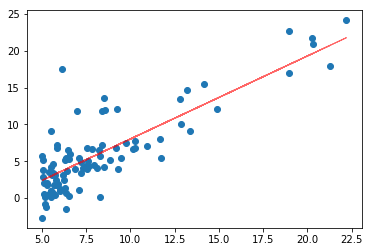

In [12]:
fig, ax = plt.subplots()
y1 = h_function(new_theta)
ax.scatter(x[:,1:2],y)
ax.plot(x[:,1:2],y1,color='r', linewidth=1, alpha=0.6)
# plt.show()
# print(x[:,1:2])